In [3]:
import json
users = ["minh", "xiwen", "jingyu"]

with open("./data/original/bookstack.json", "r") as f:
    bookstack_data = json.load(f)

with open("./data/original/indico.json", "r") as f:
    indico_data = json.load(f)

with open("./data/original/invoiceninja.json", "r") as f:
    invoiceninja_data = json.load(f)

with open("./data/original/prestashop.json", "r") as f:
    prestashop_data = json.load(f)

print(
    len(bookstack_data), len(indico_data), len(invoiceninja_data), len(prestashop_data)
)
print(
    sum(
        [
            len(bookstack_data),
            len(indico_data),
            len(invoiceninja_data),
            len(prestashop_data),
        ]
    )
)

436 549 182 1884
3051


In [ ]:
import os
import numpy as np


# Each user gets roughly equal number of data points across apps
np.random.seed(42)

# The issues should be shuffled for randomness
np.random.shuffle(prestashop_data)
np.random.shuffle(bookstack_data)
np.random.shuffle(indico_data)
np.random.shuffle(invoiceninja_data)

prestashop_splits = np.array_split(prestashop_data, len(users))
bookstack_splits = np.array_split(bookstack_data, len(users))
indico_splits = np.array_split(indico_data, len(users))
invoiceninja_splits = np.array_split(invoiceninja_data, len(users))

data = {
    "minh": {
        "prestashop": prestashop_splits[0].tolist(),
        "bookstack": bookstack_splits[0].tolist(),
        "indico": indico_splits[0].tolist(),
        "invoiceninja": invoiceninja_splits[0].tolist(),
    },
    "xiwen": {
        "prestashop": prestashop_splits[1].tolist(),
        "bookstack": bookstack_splits[1].tolist(),
        "indico": indico_splits[1].tolist(),
        "invoiceninja": invoiceninja_splits[1].tolist(),
    },
    "jingyu": {
        "prestashop": prestashop_splits[2].tolist(),
        "bookstack": bookstack_splits[2].tolist(),
        "indico": indico_splits[2].tolist(),
        "invoiceninja": invoiceninja_splits[2].tolist(),
    },
}

def check_data(u: str):
    print(u)
    print(len(data[u]["prestashop"]))
    print(len(data[u]["bookstack"]))
    print(len(data[u]["indico"]))
    print(len(data[u]["invoiceninja"]))

check_data("minh")
check_data("xiwen")
check_data("jingyu")

for user in users:
    dir_name = f"./data/splits/{user}"
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)

    with open(f"{dir_name}/prestashop.json", "w") as f:
        json.dump(data[user]["prestashop"], f, indent=4)
    with open(f"{dir_name}/bookstack.json", "w") as f:
        json.dump(data[user]["bookstack"], f, indent=4)
    with open(f"{dir_name}/indico.json", "w") as f:
        json.dump(data[user]["indico"], f, indent=4)
    with open(f"{dir_name}/invoiceninja.json", "w") as f:
        json.dump(data[user]["invoiceninja"], f, indent=4)

minh
628
146
183
61
xiwen
628
145
183
61
jingyu
628
145
183
60


In [7]:
# Concat the data and check unique ids
all_data = []
for user in users:
    all_data += data[user]["prestashop"]
    all_data += data[user]["bookstack"]
    all_data += data[user]["indico"]
    all_data += data[user]["invoiceninja"]
print(len(all_data))
all_ids = [d["id"] for d in all_data]
print(len(set(all_ids)))

3051
3051


## Data analysis

minh 1 2
xiwen 0 0
jingyu 0 0
All annotations: 2


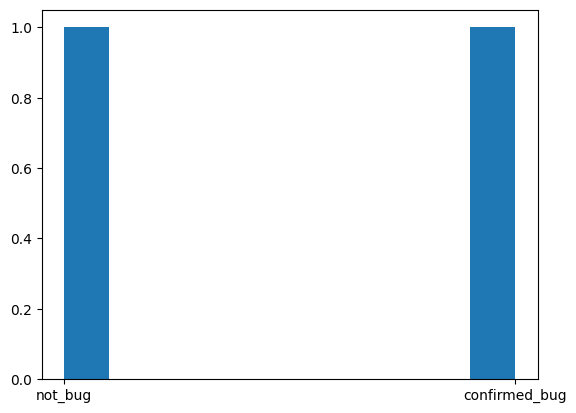

In [9]:
from matplotlib import pyplot as plt

# Load the annotations data and check
all_annotations = []
for user in users:
    dir_name = f"./data/splits/{user}"
    with open(f"{dir_name}/annotations.json", "r") as f:
        annotations = json.load(f)
    labels = []
    for ann in annotations:
        labels += ann["annotations"]
    print(user, len(annotations), len(labels))
    all_annotations += labels

print("All annotations:", len(all_annotations))

plt.hist(all_annotations);